<a href="https://colab.research.google.com/github/PayalSahrma/Course/blob/master/Gradient_Descent_Code_Demo_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import accuracy_score
from tensorflow import keras
from sklearn.model_selection import train_test_split
%matplotlib inline

### Loading data

In [ ]:
import os

# give googe drive permission
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
os.chdir("/content/drive/MyDrive/NN_Colab/Mnist - Gradient Decent ")
os.getcwd()

'/content/drive/.shortcut-targets-by-id/1clyOjhjAFaRHSJdsY0PeySdU957jPxQu/NN_Colab/Mnist - Gradient Decent '

In [ ]:
data = pd.read_csv('train.csv')
X_unseen = pd.read_csv("test.csv")

In [ ]:
data.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Extracting feature variables and target variable

In [ ]:
data_y = data['label'].values
data_x = data.drop('label',axis=1)

### Data visualization

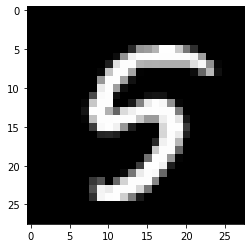

In [ ]:
img = data_x.iloc[8].values.reshape((28,28))
plt.imshow(img,cmap='gray')

In [ ]:
set(data_y)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size = 0.1, random_state=42)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.1, random_state=42)

### Functions

In [ ]:
def plot_fig(i, history):
    fig = plt.figure(figsize=(6, 6))
    plt.plot(range(1,epochs+1),history.history['val_accuracy'],label='validation')
    plt.plot(range(1,epochs+1),history.history['accuracy'],label='training')
    plt.legend(loc=0)
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.xlim([1,epochs])
#     plt.ylim([0,1])
    plt.grid(True)
    plt.title("Model Accuracy")
    plt.show()
    fig.savefig('img/'+str(i)+'-accuracy.jpg')
    plt.close(fig)

Define function to construct NN model

In [ ]:
def nn_model():
    model = keras.Sequential([
    keras.layers.Dense(128, activation=tf.nn.relu, input_shape=(784,)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)])
    return model

In [ ]:
def model_prediction(model, loc_num):
  model.predict(X_test).argmax(axis=1)

  img = X_test.iloc[loc_num].values.reshape((28,28))
  plt.imshow(img,cmap='gray')
  print("The predicted label is:" ,model.predict(X_test).argmax(axis=1)[loc_num])

Further ahead: You can try increasing the model layers and play with the hyperparameters to increase model's performance

## Varients of Gradient Descent

In [ ]:
X_train.shape

(34020, 784)

### **Batch Gradient Descent**

In [ ]:
# set batchsize and epochs
batch_size = 34020
epochs = 50

# Diclare the NN
model_batch = nn_model()

# compile the model
model_batch.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.0001),
             loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# fit the model
history_batch = model_batch.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_val, y_val))

Epoch 1/50
1/1 [==============================] - 2s 2s/step - loss: 111.6001 - accuracy: 0.1194 - val_loss: 87.6309 - val_accuracy: 0.1294
Epoch 2/50
1/1 [==============================] - 1s 618ms/step - loss: 88.0912 - accuracy: 0.1330 - val_loss: 74.0617 - val_accuracy: 0.1347
Epoch 3/50
1/1 [==============================] - 1s 591ms/step - loss: 74.3539 - accuracy: 0.1324 - val_loss: 63.7559 - val_accuracy: 0.1344
Epoch 4/50
1/1 [==============================] - 1s 595ms/step - loss: 63.9810 - accuracy: 0.1325 - val_loss: 55.3389 - val_accuracy: 0.1349
Epoch 5/50
1/1 [==============================] - 1s 597ms/step - loss: 55.5636 - accuracy: 0.1343 - val_loss: 48.5507 - val_accuracy: 0.1415
Epoch 6/50
1/1 [==============================] - 1s 573ms/step - loss: 48.8097 - accuracy: 0.1415 - val_loss: 43.3268 - val_accuracy: 0.1550
Epoch 7/50
1/1 [==============================] - 1s 593ms/step - loss: 43.5685 - accuracy: 0.1532 - val_loss: 39.3669 - val_accuracy: 0.1677
Epoch 8/

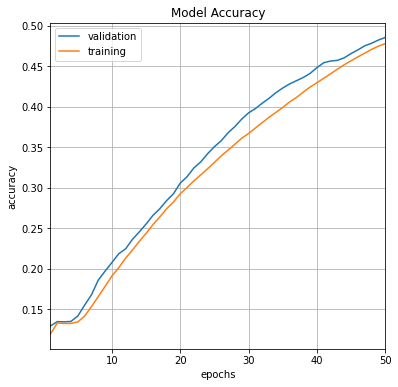

In [ ]:
plot_fig(1, history_batch)

Observations

- Learning is not complete after 50 epochs.

### **Mini Batch GD**

In [ ]:
# set batchsize and epochs
# assuming 100 batches per epoch
batch_size = 340
epochs = 50

# Diclare the NN
model_mini_batch = nn_model()

# compile the model
model_mini_batch.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.0001),
             loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# fit the model
history_mini_batch = model_mini_batch.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_val, y_val))

Epoch 1/50
101/101 [==============================] - 2s 12ms/step - loss: 14.7715 - accuracy: 0.4270 - val_loss: 6.6093 - val_accuracy: 0.5968
Epoch 2/50
101/101 [==============================] - 1s 10ms/step - loss: 5.3827 - accuracy: 0.6526 - val_loss: 4.4769 - val_accuracy: 0.6860
Epoch 3/50
101/101 [==============================] - 1s 10ms/step - loss: 3.9154 - accuracy: 0.7141 - val_loss: 3.4879 - val_accuracy: 0.7352
Epoch 4/50
101/101 [==============================] - 1s 10ms/step - loss: 3.1877 - accuracy: 0.7482 - val_loss: 2.9951 - val_accuracy: 0.7667
Epoch 5/50
101/101 [==============================] - 1s 10ms/step - loss: 2.7332 - accuracy: 0.7713 - val_loss: 2.6472 - val_accuracy: 0.7802
Epoch 6/50
101/101 [==============================] - 1s 10ms/step - loss: 2.4272 - accuracy: 0.7877 - val_loss: 2.4125 - val_accuracy: 0.7931
Epoch 7/50
101/101 [==============================] - 1s 10ms/step - loss: 2.1984 - accuracy: 0.7999 - val_loss: 2.2553 - val_accuracy: 0.801

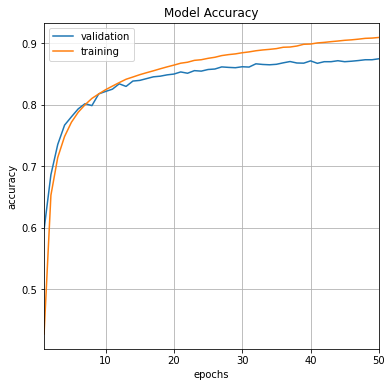

In [ ]:
plot_fig(2, history_mini_batch)

Observations
- It appears that the training is complete and the model is overfitting.

### **Stochastic GD**

**Note** following cell takes almost 15 mins to train.

In [ ]:
# set batchsize and epochs
batch_size = 1
epochs = 10

# Diclare the NN
model_sgd = nn_model()

# compile the model
model_sgd.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.0001),
             loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# fit the model
history_sgd = model_sgd.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_val, y_val))

Epoch 1/10
34020/34020 [==============================] - 67s 2ms/step - loss: 0.8619 - accuracy: 0.8437 - val_loss: 0.3152 - val_accuracy: 0.9058
Epoch 2/10
34020/34020 [==============================] - 75s 2ms/step - loss: 0.2452 - accuracy: 0.9286 - val_loss: 0.2731 - val_accuracy: 0.9201
Epoch 3/10
23222/34020 [===================>..........] - ETA: 19s - loss: 0.1772 - accuracy: 0.9458

In [ ]:
plot_fig(3, history_sgd)

Observation
- Model has completed learning even less number of epochs.

### Model evaluation

Using the three models to make predictions on unseen data.

In [ ]:
# Batch GD

model_prediction(model_batch, 3)

In [ ]:
# Mini batch GD

model_prediction(model_mini_batch, 3)

In [ ]:
#SGD

model_prediction(model_sgd, 3)

SGD has predicted correctly.

In [ ]:
# One more manual prediction test

model_prediction(model_batch, 10)

In [ ]:
model_prediction(model_mini_batch, 10)

In [ ]:
model_prediction(model_sgd, 10)

**Conclusion**

- By changing the GD algorithms you can get quicker training times.  

In [ ]:
y_pred_batch = model_batch.predict(X_test).argmax(axis=1)
accuracy_score(y_test, y_pred_batch)

Learning for the batch GD is not complete hence low accuracy.

In [ ]:
y_pred_mini = model_mini_batch.predict(X_test).argmax(axis=1)
accuracy_score(y_test, y_pred_mini)

In [ ]:
y_pred_sgd = model_sgd.predict(X_test).argmax(axis=1)
accuracy_score(y_test, y_pred_sgd)